In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

plt.rcParams['figure.dpi'] = 300
# Set float data type format
pd.options.display.float_format = '{:,.2f}'.format
# Set the maximum number of row to be displayed
pd.options.display.max_rows = 5
# Set global visualisation settings
plt.rc('font', size=14)

### PART1: Employment
- London
- Brazil

### Employment in London
- Olympics impact on employment rate & # total workforce in London
- Olympics impact on employment by industry (industry composition) in London

#### 1. Olympics impact on employment rate & # total workforce in London

In [2]:
boroughs = ['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
            'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
            'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
            'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
            'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
            'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
            'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'] # 32 boroughs
regions = ['North East', 'North West', 'Yorkshire and The Humber',
           'East Midlands', 'West Midlands', 'East', 'South East',
           'South West', 'London'] # 9 regions
countries = ['England', 'Wales', 'Scotland', 'Northern Ireland']  # 4 countries

# Great Britain consists of 'England', 'Wales', 'Scotland'; 
# United Kingdom consists of Great Britain and Northern Ireland;

In [3]:
path1 = '../datasets_full/London/'
path2 = '../datasets_full/London_more/'
activity_df = pd.read_csv(path1 + 'london_economic_activity.csv') 
employment_df = pd.read_csv(path2 + 'workforce-jobs-ons.csv')
try:
    activity_df['year'] = np.array([s.split(' ')[2] for s in activity_df['year']]).astype('int')
except:
    pass
activity_df = activity_df.dropna()

In [4]:
#### Economically active & Employment Rate by Sex
activity_df_total = activity_df.groupby(['year', 'area']).sum()
activity_df_total['employment_rate'] = activity_df_total['economically_active']/activity_df_total['working_age']*100
activity_df_total = activity_df_total.reset_index(level='area')
activity_df = activity_df.set_index('year')

In [5]:
display(activity_df_total.head())

,area,economically_active,working_age,percent,confidence,employment_rate
year,,,,,,
2005,Barking and Dagenham,"72,400.00","105,000.00",138.50,10.50,68.95
2005,Barnet,"159,700.00","214,700.00",149.20,11.00,74.38
2005,Bexley,"111,800.00","140,600.00",159.30,9.70,79.52
2005,Brent,"132,200.00","184,600.00",143.10,10.40,71.61
2005,Bromley,"156,400.00","188,900.00",165.80,8.70,82.80


In [6]:
employ_ratio = pd.pivot_table(activity_df, index=activity_df.index,
                              values=['economically_active', 
                                      'percent', 
                                      'confidence'], 
                              columns=['area', 'gender'])

In [7]:
display(employ_ratio.head())

confidence                                                  \
area   Barking and Dagenham      Barnet      Bexley      Brent      Bromley   
gender                    F    M      F    M      F    M     F    M       F   
year                                                                          
2005                   5.50 5.00   5.90 5.10   5.30 4.40  5.90 4.50    4.80   
2006                   5.40 5.00   5.50 4.80   5.10 4.20  6.00 5.30    5.20   
2007                   5.40 4.70   5.10 4.80   5.20 4.40  5.80 4.80    4.80   
2008                   5.10 4.70   5.00 4.40   5.40 4.70  5.40 4.10    5.00   
2009                   5.50 5.00   5.90 5.00   5.50 5.00  5.90 5.00    6.00   

             ...        percent                                             \
area         ... Waltham Forest       Wandsworth       West Midlands         
gender    M  ...              F     M          F     M             F     M   
year         ...                                                             
2005   3.90  ...          62.20 82.60      72.70 82.40         68.00 82.90   
2006   3.90  ...          67.70 76.50      70.50 84.70         68.10 82.90   
2007   3.50  ...          63.30 80.00      74.60 83.50         67.80 82.60   
2008   4.20  ...          58.40 81.00      76.10 86.30         68.20 82.50   
2009   4.50  ...          62.60 80.60      76.20 89.40         68.60 82.30   

                                                         
area   Westminster       Yorkshire and The Humber        
gender           F     M                        F     M  
year                                                     
2005         61.70 77.10                    68.90 83.10  
2006         62.30 73.30                    69.10 83.30  
2007         57.10 76.80                    68.80 82.20  
2008         59.90 77.30                    69.00 82.60  
2009         62.70 82.50                    69.00 81.70  

[5 rows x 288 columns]

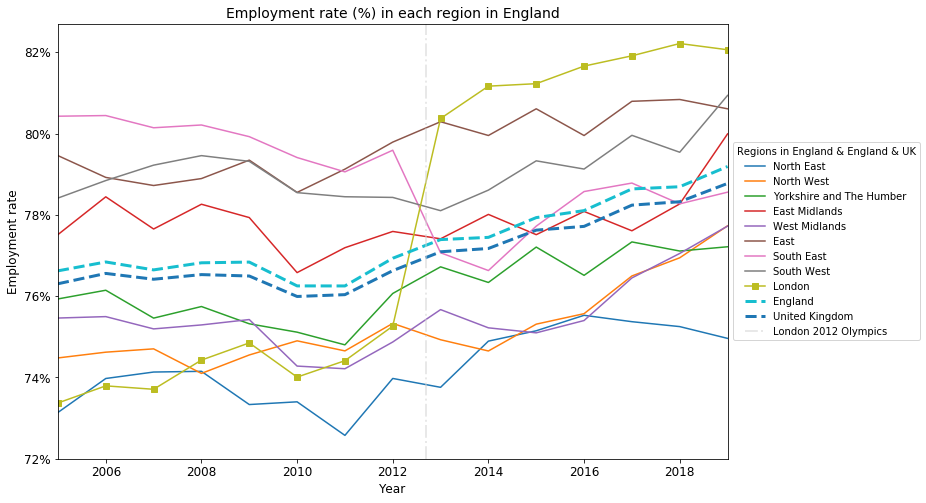

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))
for i, x in enumerate([*regions, 'England', 'United Kingdom']):
    df = activity_df_total.loc[(activity_df_total['area']==x), 'employment_rate']
    if x == 'London':
        df.plot(ax=ax, label=x, marker='s')
    elif x in ['England', 'United Kingdom']:
        df.plot(ax=ax, label=x, linestyle='dashed', linewidth=3)
    else: 
        df.plot(ax=ax, label=x)
ax.set_title('Employment rate (%) in each region in England', fontsize=14);
ax.set_xlabel('Year', fontsize=12);
ax.set_ylabel('Employment rate', fontsize=12);
ax.axvline(x=2012.7, linewidth=2, color='lightgray', linestyle='-.', alpha=0.5, label='London 2012 Olympics')
plt.xticks(fontsize=12);
plt.yticks(range(72, 83, 2), [str(x) + '%' for x in range(72, 83, 2)], fontsize=12) 
plt.legend()
ax.legend(loc='center left', title='Regions in England & England & UK', bbox_to_anchor=(1, 0.5));

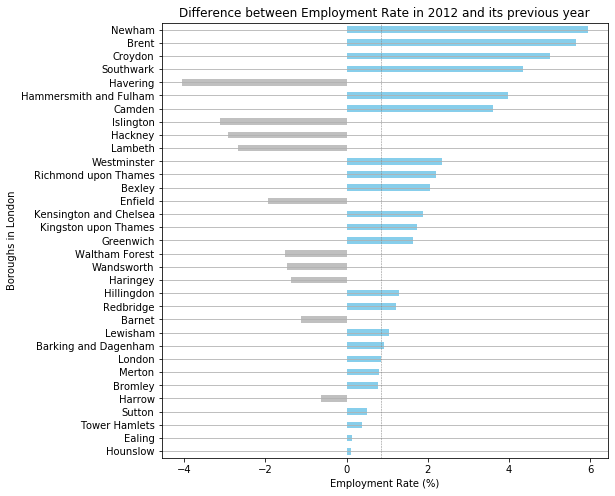

In [9]:
df3 = activity_df_total.loc[(activity_df_total.index >= 2011) & (activity_df_total.index <= 2012), :]
df3 = df3.reset_index()
rate_12 = df3.loc[df3['year'] == 2012, ['area', 'employment_rate']].set_index('area')
rate_11 = df3.loc[df3['year'] == 2011, ['area', 'employment_rate']].set_index('area')
diff = rate_12.subtract(rate_11)

fig, ax = plt.subplots(figsize=(8,8))

diff_sort = diff.reindex(diff['employment_rate'].abs().sort_values().index)
diff_sort['positive'] = (diff_sort['employment_rate'] > 0)

# plot 1
df_boroughs = diff_sort[diff_sort.index.isin([*boroughs, 'London'])]
df_boroughs['employment_rate'].plot.barh(ax=ax,color=df_boroughs.positive.map({True: 'skyblue', False: 'silver'}))
ax.yaxis.grid();
ax.axvline(x=df_boroughs.loc[df_boroughs.index=='London','employment_rate'].values, 
           linestyle='dashed', color='gray', linewidth=0.5)
ax.set_title('Difference between Employment Rate in 2012 and its previous year');
ax.set_xlabel('Employment Rate (%)');
ax.set_ylabel('Boroughs in London');

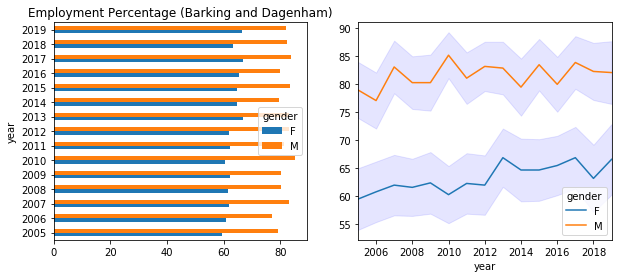

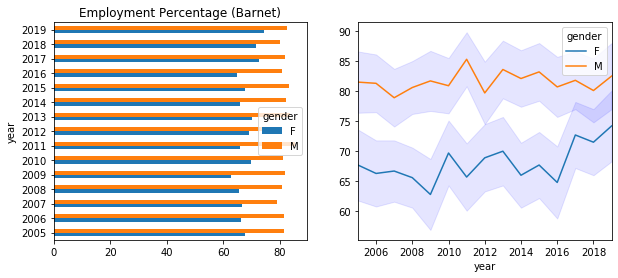

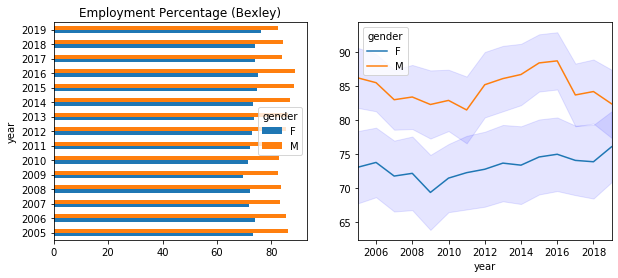

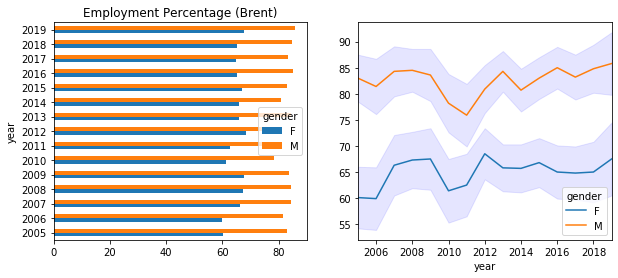

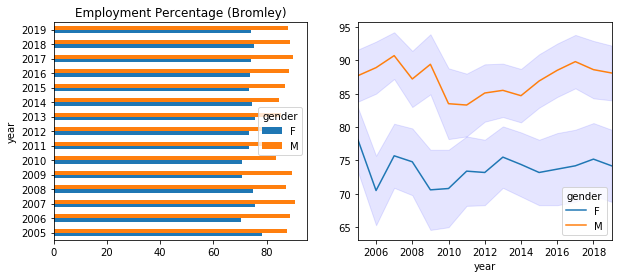

In [10]:
for region in boroughs[:5]:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    df = employ_ratio['percent'][region]
    df.plot.barh(ax=axes[0])
    axes[0].set_title('Employment Percentage ({})'.format(region))
    
    df_CI = employ_ratio['confidence'][region]
    df.plot(ax=axes[1])
    axes[1].fill_between(df_CI.index, (df['F']-df_CI['F']), (df['F']+df_CI['F']), color='b', alpha=.1)
    axes[1].fill_between(df_CI.index, (df['M']-df_CI['M']), (df['M']+df_CI['M']), color='b', alpha=.1)

In [11]:
#### Number of workforce jobs
display(employment_df.head())

,date,area,total_workforce_jobs,employee_jobs,self_employment_jobs
0,Mar-05,UK,31356985,27579660,3493495
1,Jun-05,UK,31403800,27625580,3501806
2,Sep-05,UK,31541152,27730717,3533639
3,Dec-05,UK,31628586,27784245,3569405
4,Mar-06,UK,31708853,27831410,3607458


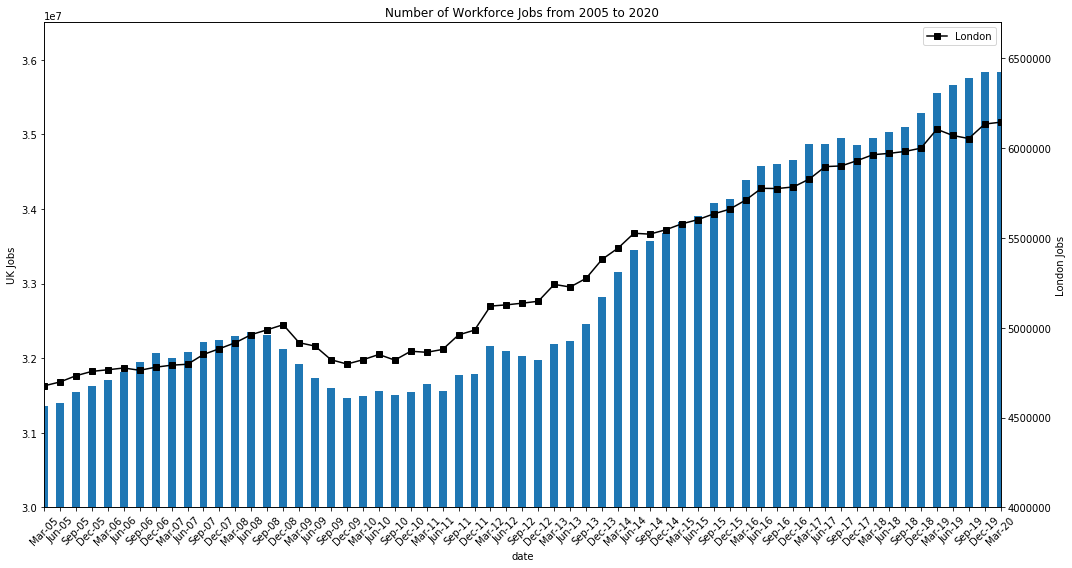

In [12]:
fig, ax1 = plt.subplots(figsize=(15,8))
try: 
#     employment_df['date'] = pd.to_datetime(employment_df['date'], format='%b-%y')
    employment_df = employment_df.set_index('date')
except:
    pass
# employment_df = employment_df['2005-03-01':'2015-03-01']

employment_df_UK = employment_df.loc[employment_df['area']=='UK', 'total_workforce_jobs']
employment_df_london = employment_df.loc[employment_df['area']=='London', 'total_workforce_jobs']

employment_df_UK.plot.bar(ax=ax1)
ax1.set_ylim(bottom=30000000, top=36500000)
ax1.set_ylabel('UK Jobs')
ax1.tick_params(axis='x', labelrotation=45)
ax1.set_title('Number of Workforce Jobs from 2005 to 2020')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
employment_df_london.plot.line(ax=ax2, marker='s', color='k', label='London')
ax2.set_ylim(4000000, 6700000)
ax2.set_ylabel('London Jobs')
plt.legend()
fig.tight_layout()  # otherwise the right y-label is slightly clipped

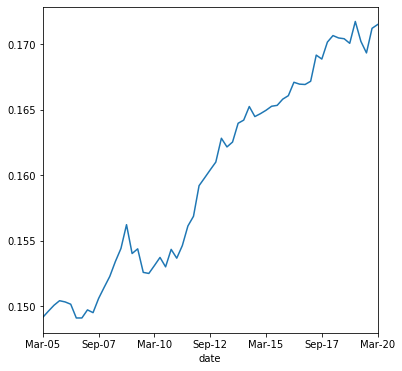

In [13]:
# london jobs/uk jobs
fig, ax = plt.subplots(figsize=(6,6))
(employment_df_london/employment_df_UK).plot()

#### 2. Olympics impact on employment by industry in London

In [14]:
pathh = '../datasets_full/London_more/'
employ_by_industry = pd.read_excel(open('{}employment-rate-by-industry.xlsx'.format(pathh), 'rb'), 
                                   sheet_name='Employ Industry Percent', header=[0, 1], index_col=0) 

In [15]:
boroughs = ['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
            'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
            'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
            'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
            'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
            'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
            'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'] # 32 boroughs
regions = ['North East', 'North West', 'Yorkshire and The Humber',
           'East Midlands', 'West Midlands', 'East', 'South East',
           'South West', 'London'] # 9 regions
countries = ['England', 'Wales', 'Scotland', 'Northern Ireland']  # 4 countries

In [16]:
employ_by_industry.columns = employ_by_industry.columns.swaplevel(0, 1)
employ_by_industry.index = np.array([s.split(' ')[2] for s in employ_by_industry.index]).astype(str)

In [17]:
display(employ_by_industry.head())

,London,UK,London,UK,London,UK,London,UK,London,UK,London,UK,London,UK,London,UK,London,UK,London,UK
(SIC 2007),A:agriculture and fishing,A:agriculture and fishing (SIC 2007),"B,D,E:energy and water","B,D,E:energy and water (SIC 2007)",C:manufacturing,C:manufacturing (SIC 2007),F:construction,F:construction (SIC 2007),"G,I:distribution, hotels and restaurants","G,I:distribution, hotels and restaurants (SIC 2007)","H,J:transport and communications","H,J:transport and communications (SIC 2007)","K-N:banking, finance and insurance","K-N:banking, finance and insurance (SIC 2007)",O-Q:public admin. education and health,O-Q:public admin. education and health (SIC 2007),R-U:other services,R-U:other services (SIC 2007),G-Q:total services,G-Q:total services (SIC 2007)
2004,0.10,1.00,0.80,1.40,5.60,13.10,7.30,8.40,17.80,19.20,13.90,9.60,22.00,14.00,25.20,27.60,6.70,5.20,85.60,75.50
2005,0.10,1.00,0.70,1.40,5.30,12.50,7.40,8.50,17.00,19.00,13.00,9.40,22.80,14.20,26.30,28.20,6.60,5.20,85.70,76.00
2006,0.10,1.00,0.80,1.50,5.50,12.20,7.60,8.70,16.30,18.80,12.70,9.40,22.20,14.10,27.20,28.40,6.70,5.30,85.10,76.00
2007,0.20,1.00,1.10,1.60,6.30,12.10,7.50,8.70,15.90,18.60,12.50,9.40,23.80,14.70,25.50,28.10,6.40,5.30,84.10,76.00
2008,0.20,1.10,1.10,1.70,5.60,11.40,7.20,8.80,16.40,18.70,12.50,9.40,23.90,14.50,25.30,28.50,7.00,5.30,85.00,76.40


In [18]:
df_london = employ_by_industry['London']
df_london.columns = [s.split(':')[1].capitalize() for s in df_london.columns]
df_london = df_london[df_london.columns[~df_london.columns.isin(['Agriculture and fishing', 'Total services'])]]
df_london.index = df_london.index.astype(int)

In [19]:
df_UK = employ_by_industry['UK']
df_UK.columns = [s.split(':')[1].capitalize().split(' (')[0] for s in df_UK.columns]
df_UK = df_UK[df_UK.columns[~df_UK.columns.isin(['Agriculture and fishing', 'Total services'])]]

In [20]:
IO = ['Construction', 
      'Distribution, hotels and restaurants', 
      'Transport and communications']
df_london_IO = df_london.copy()
df_london_IO['Others'] = df_london_IO.loc[:, ~df_london_IO.columns.isin(IO)].sum(axis=1)

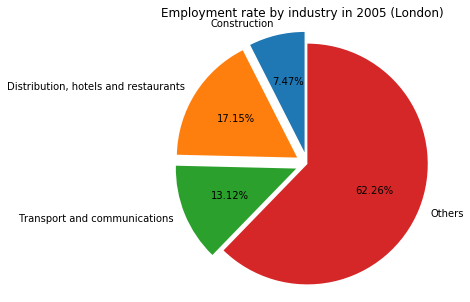

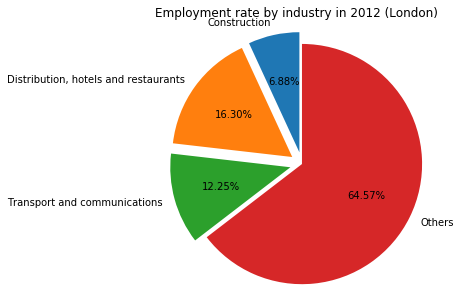

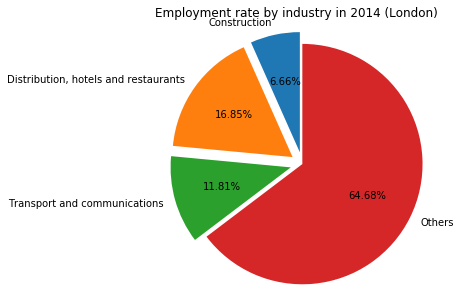

In [21]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
for year in [2005, 2012, 2014]:
    df_plot = df_london_IO.loc[df_london_IO.index==year, [*IO, 'Others']]
    labels = df_plot.columns
    london_perct = np.array(*df_plot.values)
    # UK_perct = df_UK.loc[df_UK.index==year, :] * 100
    fig, ax = plt.subplots(figsize=(5, 5))
    explode = [(s in ['Construction', 'Distribution, hotels and restaurants', 
                      'Transport and communications'])*0.1 for s in labels]
    ax.pie(london_perct, explode=explode, labels=labels, autopct='%1.2f%%', startangle=90)
    #pctdistance=0.9, radius=1.2)
    # wedges, texts, autotexts = axes[1].pie(UK_perct, labels=None, autopct='%1.2f%%', pctdistance=0.9, radius=1.2)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title('Employment rate by industry in {} (London)'.format(year), fontsize=12)
    # ax.set_title('Employment rate by industry in {} (UK)'.format(year))
#     ax.legend(wedges, london_perct, title="Industries", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

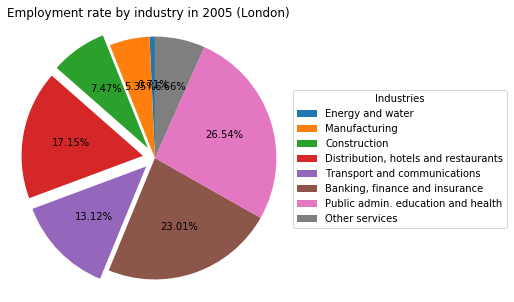

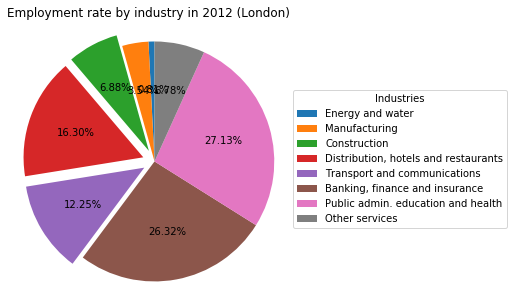

In [22]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = df_london.columns
for year in [2005, 2012]:
    df_plot = df_london.loc[df_london.index == year, :]
    london_perct = np.array(*df_plot.values)
    fig, ax = plt.subplots(figsize=(5, 5))
    explode = [(s in ['Construction', 'Distribution, hotels and restaurants', 
                      'Transport and communications']) * 0.1 for s in labels]
    wedges, texts, autotexts = ax.pie(london_perct, explode=explode, 
                                      autopct='%1.2f%%', startangle=90)
    ax.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title('Employment rate by industry in {} (London)'.format(year))
    ax.legend(wedges, labels, title="Industries", 
              loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

/Users/ruiyan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


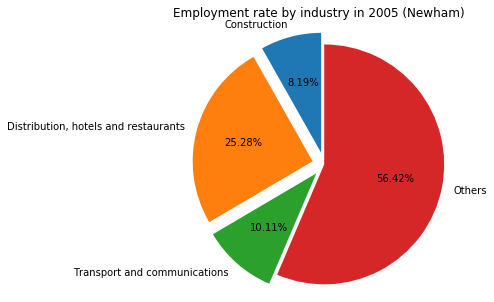

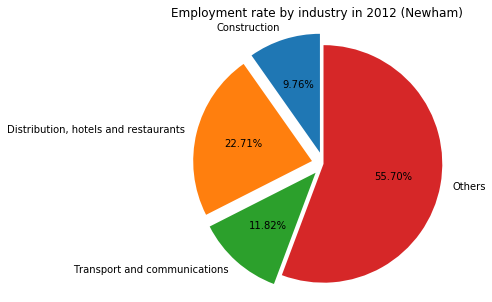

In [23]:
df_sets = {}

for year in [2005, 2012]:
    df = pd.read_excel(open(pathh + 'employment-rate-by-industry.xlsx', 'rb'), 
                       sheet_name=str(year), header=[0, 1], index_col=0)
    df.columns = df.columns.swaplevel(0, 1)
    df_percent = df.loc[:, ['Area','percent']]
    df_percent = df_percent.set_index('Area')['percent']
    df_percent.columns = [s.split(':')[1].capitalize() for s in df_percent.columns]

    IO = ['Construction', 'Distribution, hotels and restaurants', 'Transport and communications']
    df_IO = df_percent.copy()
    df_IO = df_IO.replace('!', np.nan)
    df_IO = df_IO[df_IO.columns[~df_IO.columns.isin(['Agriculture and fishing', 'Total services'])]]    
    df_IO['Others'] = df_IO.loc[:, ~df_IO.columns.isin(IO)].sum(axis=1)
    
    df_IO.index = [s[0] for s in df_IO.index]
    df_plot = df_IO.loc[:, [*IO, 'Others']]

    fig, ax = plt.subplots(figsize=(5, 5))
    explode = [(s in IO)*0.1 for s in df_plot.columns]
    ax.pie(df_plot.loc[df_plot.index=='Newham', :], explode=explode, labels=df_plot.columns, 
           autopct='%1.2f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title('Employment rate by industry in {} (Newham)'.format(year), fontsize=12)
    plt.show()

### Employment in Brazil

In [24]:
path = '../datasets_full/Rio/'
brazil = pd.read_csv(path + 'brazil_unemployment.csv')  # Rio, Brazil

In [25]:
df_employed = brazil.loc[brazil['category']=='Workforce - Employed',:].set_index(['year', 'quarter', 'state'])
df_employed = df_employed.rename(columns={'value': 'employed_population'})
display(df_employed.head())

df_unemployed = brazil.loc[brazil['category']=='Workforce - Unemployed',:].set_index(['year', 'quarter', 'state'])
df_unemployed = df_unemployed.rename(columns={'value': 'unemployed_population'})

df = pd.concat([df_employed, df_unemployed], axis=1, join='inner')
df['employment_rate'] = df['employed_population']/(df['employed_population'] + df['unemployed_population'])
display(df.head())

category  employed_population
year quarter state                                              
2012 Q1      Rondônia  Workforce - Employed                  701
             Acre      Workforce - Employed                  286
             Amazonas  Workforce - Employed                 1392
             Roraima   Workforce - Employed                  170
             Pará      Workforce - Employed                 3123

category  employed_population  \
year quarter state                                                 
2012 Q1      Rondônia  Workforce - Employed                  701   
             Acre      Workforce - Employed                  286   
             Amazonas  Workforce - Employed                 1392   
             Roraima   Workforce - Employed                  170   
             Pará      Workforce - Employed                 3123   

                                     category  unemployed_population  \
year quarter state                                                     
2012 Q1      Rondônia  Workforce - Unemployed                     61   
             Acre      Workforce - Unemployed                     28   
             Amazonas  Workforce - Unemployed                    172   
             Roraima   Workforce - Unemployed                     16   
             Pará      Workforce - Unemployed                    268   

                       employment_rate  
year quarter state                      
2012 Q1      Rondônia             0.92  
             Acre                 0.91  
             Amazonas             0.89  
             Roraima              0.91  
             Pará                 0.92

In [26]:
df_employed_rate = df['employment_rate']
df_employed_rate = df_employed_rate.reset_index(level='state')
display(df_employed_rate.head())

state  employment_rate
year quarter                           
2012 Q1       Rondônia             0.92
     Q1           Acre             0.91
     Q1       Amazonas             0.89
     Q1        Roraima             0.91
     Q1           Pará             0.92

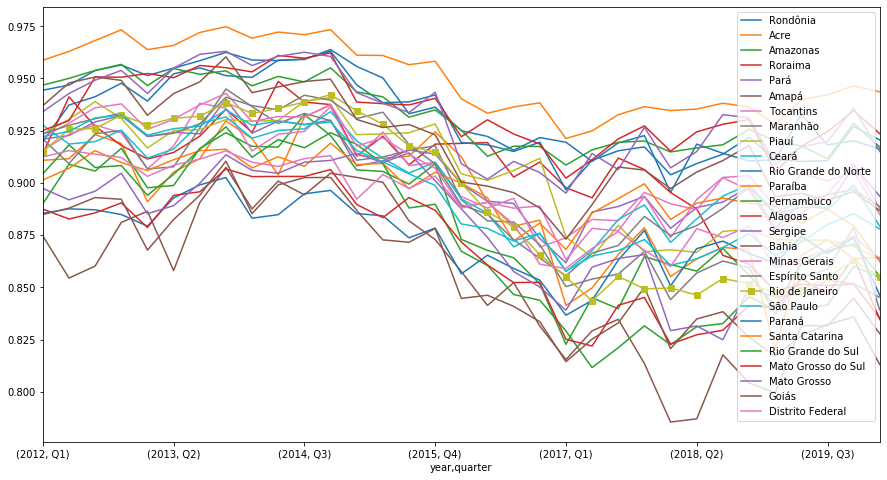

In [27]:
fig, ax = plt.subplots(figsize=(15, 8))
for state in df_employed_rate.state.unique():
    df_plot = df_employed_rate.loc[df_employed_rate['state']==state, 'employment_rate']
    if state=='Rio de Janeiro':
        df_plot.plot(ax=ax, label=state, marker='s')
    else:
        df_plot.plot(ax=ax, label=state)
ax.legend(loc='center left', title='States of Brazil', bbox_to_anchor=(1, 0.5));
plt.legend()